# Spooky Auther Identification

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import string
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('NLTK version: {}'.format(nltk.__version__))
print('Seaborn version: {}'.format(sns.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Sklearn verion: {}'.format(sklearn.__version__))

Numpy version: 1.15.1
Pandas version: 0.23.4
NLTK version: 3.3
Seaborn version: 0.9.0
Matplotlib version: 2.2.3
Sklearn verion: 0.19.2


# 1. Load the Data set

In [2]:
train_df = pd.read_csv("data/spooky-author/train.csv")
test_df = pd.read_csv("data/spooky-author/train.csv")
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


# 2. Exploratory Data Analysis
Let's look at some infromation about the data

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


What does the author data distribution looks like

No handles with labels found to put in legend.


Text(0,0.5,'Number of data points')

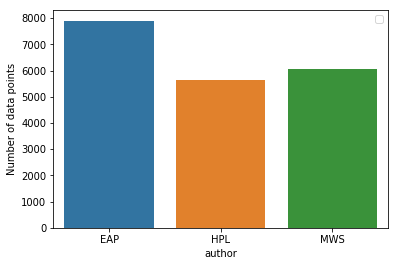

In [4]:
sns.countplot(train_df['author'])
plt.legend()
plt.ylabel('Number of data points')


The data seems to be pretty balanced from a training stand point

# 4. Standard NLP data transformations
We will perform some common methods of data transformation
* Remove punctuations
* Remove stop words
* Stemming

In [5]:
# remove punctuations
def remove_punctuations(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

In [6]:
train_df['text'] = train_df['text'].apply(remove_punctuations)
train_df.head()

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL


In [7]:
# Remove stop words
# We will use nltk library to eliminate stop words
stop = stopwords.words('english')
stop[:4]

['i', 'me', 'my', 'myself']

In [8]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word not in stop]
    return " ".join(text)

In [9]:
train_df['text'] = train_df['text'].apply(stopwords)
train_df.head()

,id,text,author
0,id26305,this process however afforded means ascertaini...,EAP
1,id17569,it never occurred fumbling might mere mistake,HPL
2,id11008,in left hand gold snuff box capered hill cutti...,EAP
3,id27763,how lovely spring as looked windsor terrace si...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL


Let's quickly look at the top word count before we do stemming

In [11]:
# create a count vectorizer object
count_vect = CountVectorizer()
# fit the count vectorizer using the text data
count_vect.fit(train_df['text'])
# Collect the vocabulary items in a dcitionary
dictionary = count_vect.vocabulary_.items()

# List to store vocab and its count
vocab = []
count = []

for key,value in dictionary:
    vocab.append(key)
    count.append(value)
    
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)
vocab_bef_stem.head(20)

υπνος         25367
οἶδα          25366
émeutes       25365
élite         25364
æschylus      25363
ærostation    25362
æronauts      25361
æronaut       25360
ærial         25359
æneid         25358
æmilianus     25357
ægyptus       25356
ædiles        25355
ædile         25354
ångstrom      25353
zuro          25352
zubmizzion    25351
zorry         25350
zopyrus       25349
zones         25348
dtype: int64

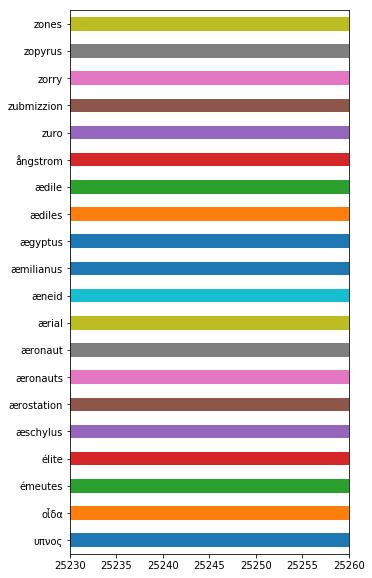

In [12]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

* Let's bundle workds of same roots together aka stemming

In [18]:
stemmer = SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [19]:
train_df['text'] = train_df['text'].apply(stemming)
train_df.head(10)

,id,text,author
0,id26305,this process howev afford mean ascertain dimen...,EAP
1,id17569,it never occur fumbl might mere mistak,HPL
2,id11008,in left hand gold snuff box caper hill cut man...,EAP
3,id27763,how love spring as look windsor terrac sixteen...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,a youth pass solitud best year spent gentl fem...,MWS
6,id09674,the astronom perhap point took refug suggest n...,EAP
7,id13515,the surcingl hung riband bodi,EAP
8,id19322,i knew could say stereotomi without brought th...,EAP
9,id00912,i confess neither structur languag code govern...,MWS


* Top words after stemming

In [24]:
# create the object of the tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(train_df['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

* Let's look at word count after stemming

In [44]:
stemm_vect_df = pd.DataFrame()
count = []
word = []
for key,value in dictionary:
    count.append(value)
    word.append(key)
stemm_vect_df['word'] = word    
stemm_vect_df['count'] = count
stemm_vect_df = stemm_vect_df.sort_values(by=['count'],ascending=False)
stemm_vect_df.head()

,word,count
10560,υπνος,15226
14140,οἶδα,15225
10656,émeut,15224
12363,élite,15223
10868,æschylus,15222


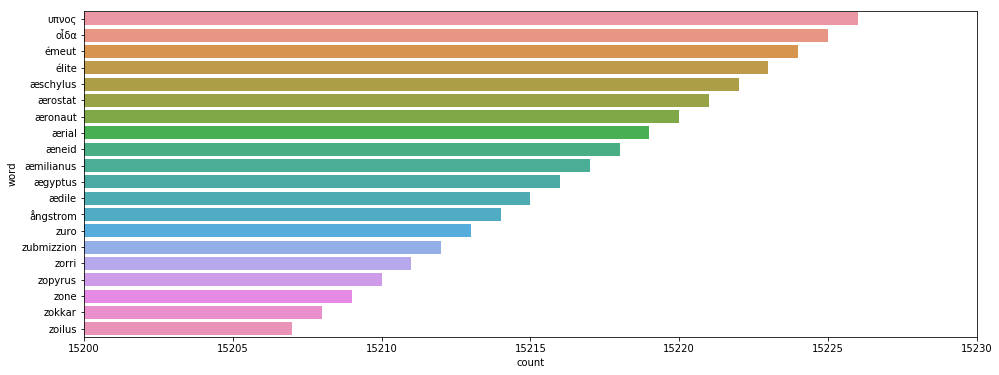

In [51]:
f,ax = plt.subplots(1,1,figsize =(16,6))
g = sns.barplot(x='count',y='word',data=stemm_vect_df.head(20))
g.set(xlim=(15200,15230))
plt.show()

* Now look at text lengths by each author. 

In [53]:
train_df['length'] = train_df['text'].apply(lambda x: len(x))
train_df.head()

,id,text,author,length
0,id26305,this process howev afford mean ascertain dimen...,EAP,145
1,id17569,it never occur fumbl might mere mistak,HPL,38
2,id11008,in left hand gold snuff box caper hill cut man...,EAP,116
3,id27763,how love spring as look windsor terrac sixteen...,MWS,144
4,id12958,find noth els even gold superintend abandon at...,HPL,102


In [83]:
eap_df = train_df[train_df['author']=='EAP']
hpl_df = train_df[train_df['author']=='HPL']
mws_df = train_df[train_df['author']=='MWS']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


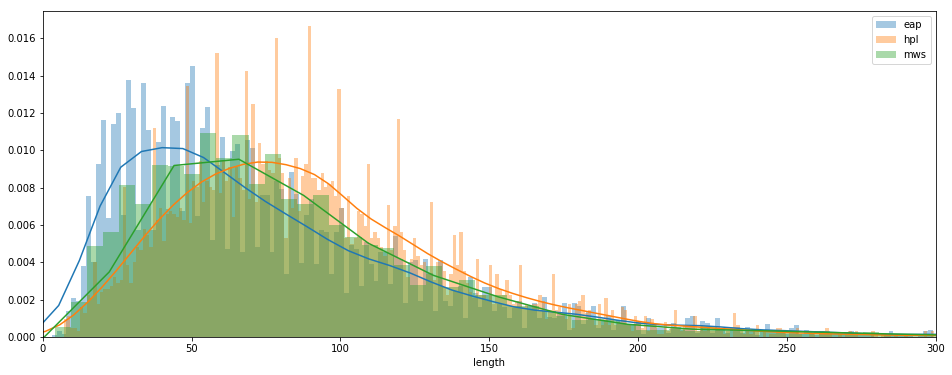

In [63]:
f,ax = plt.subplots(1,1,figsize=(16,6))
sns.distplot(eap_df['length'],bins=500,label='eap')
sns.distplot(hpl_df['length'],bins=500,label='hpl')
sns.distplot(mws_df['length'],bins=500,label='mws')
plt.xlim(0,300)
plt.legend(loc='upper right')
plt.show()

Top words for each writer

Edgar Allan Poe

(9800, 9850)

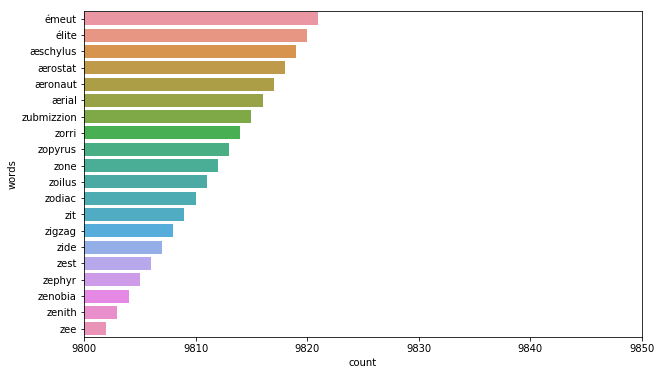

In [73]:
eap_tfid_vec = TfidfVectorizer("english")
eap_tfid_vec.fit(eap_df['text'])
eap_dictionary = eap_tfid_vec.vocabulary_.items()

words =[]
count =[]
eap_tfid_df = pd.DataFrame()

for key,values in eap_dictionary:
    words.append(key)
    count.append(values)
    
eap_tfid_df['words'] = words
eap_tfid_df['count'] = count
eap_tfid_df = eap_tfid_df.sort_values(by=['count'],ascending=False)

plt.subplots(1,1,figsize=(10,6))
sns.barplot(x='count',y='words',data=eap_tfid_df.head(20))
plt.xlim(9800,9850)

Mary Shelley

(9370, 9400)

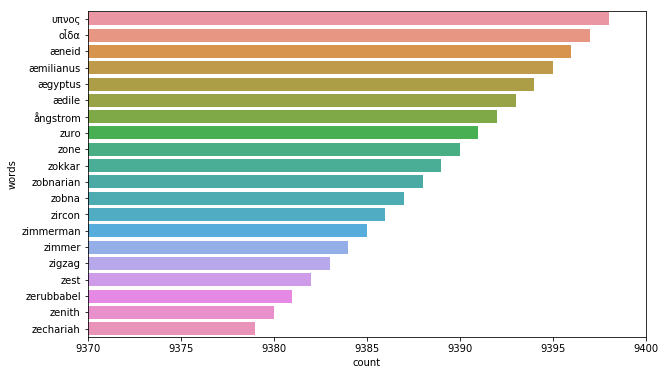

In [78]:
hpl_tfid_vec = TfidfVectorizer("english")
hpl_tfid_vec.fit(hpl_df['text'])
hpl_dictionary = hpl_tfid_vec.vocabulary_.items()

words =[]
count =[]
hpl_tfid_df = pd.DataFrame()

for key,values in hpl_dictionary:
    words.append(key)
    count.append(values)
    
hpl_tfid_df['words'] = words
hpl_tfid_df['count'] = count
hpl_tfid_df = hpl_tfid_df.sort_values(by=['count'],ascending=False)

plt.subplots(1,1,figsize=(10,6))
sns.barplot(x='count',y='words',data=hpl_tfid_df.head(20))
plt.xlim(9370,9400)

HP Lovecraft

(7100, 7122)

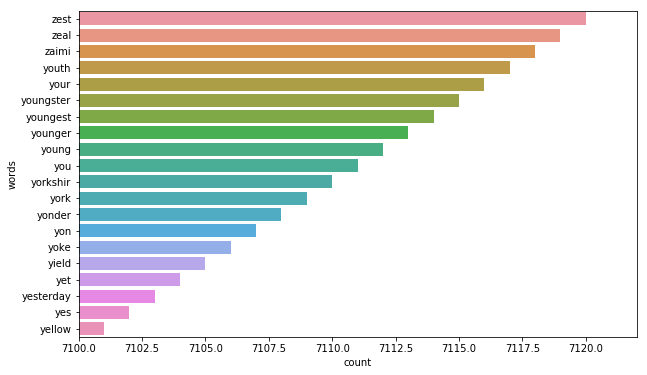

In [87]:
mws_tfid_vec = TfidfVectorizer("english")
mws_tfid_vec.fit(mws_df['text'])
mws_dictionary = mws_tfid_vec.vocabulary_.items()

words =[]
count =[]
mws_tfid_df = pd.DataFrame()

for key,values in mws_dictionary:
    words.append(key)
    count.append(values)
    
mws_tfid_df['words'] = words
mws_tfid_df['count'] = count
mws_tfid_df = mws_tfid_df.sort_values(by=['count'],ascending=False)

plt.subplots(1,1,figsize=(10,6))
sns.barplot(x='count',y='words',data=mws_tfid_df.head(20))
plt.xlim(7100,7122)

* We observe that all the three authors have distinct word usage and in high frequencies. TF-IDF can be used as a usefull input feature for the model

# 5. Feature Extraction

TF-IDF is product of two terms: The first term is the normalized Term Frequency(TF), aka the number of times a word appears in a document, divided by the total number of words in that document. The second term  is the inverse Document Frequency(IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term apears

TF(t) = (Number of times t appreas in the document)/(Total number of terms in the document)
IDF(t) = log_e(Total number of documents/Number of documents with term t in it)

TF-IDF Extraction

In [92]:
# Extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(train_df['text'])

# Collect the tfid matrix in numpy arrary
array = tfid_matrix.todense()

# Store the tf-idf array into the a Dataframe
tf_idf_df = pd.DataFrame(array)
tf_idf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15217,15218,15219,15220,15221,15222,15223,15224,15225,15226
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Model Training
In this notebook we are going with one model as this is for practice purpose. We are going to train Naive Bayes Classifier. It is an appropriate choice as we have a medium sized dataset, NB classifier scales well and also NB classifier  has been historically used in NLP tasks. We will train multinomial and bernoulli NB classifier, since they almost alwasy outperform Gaussian NB classifier in NLP taksks

In [93]:
# Add target/output variable to the data set
tf_idf_df['output'] = train_df['author']
tf_idf_df['id'] = train_df['id']
tf_idf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15219,15220,15221,15222,15223,15224,15225,15226,output,id
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id26305
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id17569
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id11008
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id27763
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id12958


Seperate featuresand output ofthe models

In [95]:
output ='output'
features = tf_idf_df.columns.tolist()
features.remove(output)
features.remove('id')

Import sklearn modules needed

In [98]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

* List of alpha patameters we are going to try

In [99]:
alpha_list1 = np.linspace(0.006,0.1, 20)
alpha_list1 = np.around(alpha_list1,decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

GridSearchCV allows us to tune parameters of a model through k-fold cross validation using parameter grid in one go

In [100]:
parameter_grid = [{"alpha":alpha_list1}]

In [102]:
# Classifier object
classifier1 = MultinomialNB()

# Grid search object using 4 fold cross validation and neg_log_loss as scoring parameter
gridsearch1 = GridSearchCV(classifier1, parameter_grid, scoring='neg_log_loss', cv=4)

# Fit the grid search
gridsearch1.fit(tf_idf_df[features], tf_idf_df[output])

GridSearchCV(cv=4, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

Collect results in pandas dataframe

In [103]:
results1 = pd.DataFrame()
# Collect alpha list
results1['alpha']=gridsearch1.cv_results_['param_alpha'].data

# Collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

Plot of logloss vs alpha

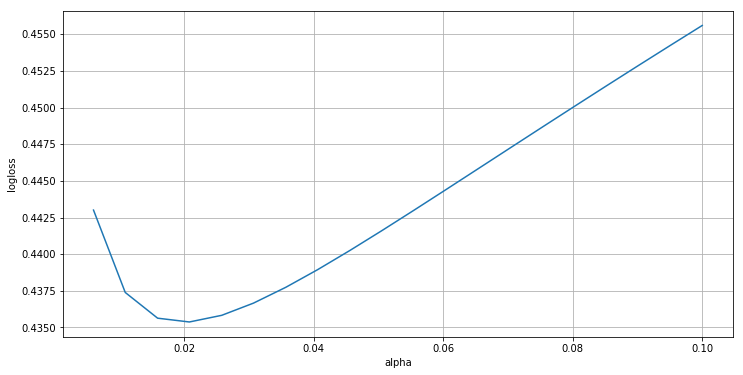

In [104]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'],-results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [105]:
print("Best Parameter: .{}".format(gridsearch1.best_params_))

Best Parameter: .{'alpha': 0.0208}


In [106]:
print("Best score: {}".format(gridsearch1.best_score_))

Best score: -0.4353751856454536


Tuning Multinomial Naive Bayes Classifier by keeping the range of alpha parameters between 0.006 and 0.002